In [20]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load data
jobs_adzuna = pd.read_csv("../Sofia/jobs_adzuna_analysis.csv")
jobs_github = pd.read_csv("../MG/final_jobs.csv")

# Combine datasets
combined = pd.concat([jobs_adzuna, jobs_github], ignore_index=True)

combined.to_csv("combined.csv", index=False)



In [21]:
combined = pd.read_csv('combined.csv')


In [24]:
print(combined.shape)
print(combined.head())
print(combined["job_title"].value_counts())


(1393, 6)
   date     job_title  salary_in_usd work_mode country  \
1  2025  Data Analyst        50000.0    hybrid      GB   
2  2025  Data Analyst        24000.0    onsite      GB   
3  2025  Data Analyst        35000.0    onsite      GB   
4  2025  Data Analyst        43779.0    onsite      GB   
5  2025  Data Analyst        25904.0    onsite      GB   

                                        skills  
1  ['excel', 'power bi', 'python', 'r', 'sql']  
2                                        ['r']  
3                                        ['r']  
4                                        ['r']  
5                                        ['r']  
job_title
Data Analyst                  775
Data Engineer                 284
Data Scientist                270
Machine Learning Developer     64
Name: count, dtype: int64


In [25]:
#drop rows where job_title is "Other" & change 2 positions Machine Learning:

# Data cleaning
combined = combined[combined["job_title"] != "Other"].copy()
combined.loc[:, 'job_title'] = combined['job_title'].replace('Machine Learning', 'Machine Learning Developer')

print(combined["job_title"].value_counts())
print(combined.shape)


job_title
Data Analyst                  775
Data Engineer                 284
Data Scientist                270
Machine Learning Developer     64
Name: count, dtype: int64
(1393, 6)


In [26]:
combined

,date,job_title,salary_in_usd,work_mode,country,skills
1,2025,Data Analyst,50000.0,hybrid,GB,"['excel', 'power bi', 'python', 'r', 'sql']"
2,2025,Data Analyst,24000.0,onsite,GB,['r']
3,2025,Data Analyst,35000.0,onsite,GB,['r']
4,2025,Data Analyst,43779.0,onsite,GB,['r']
5,2025,Data Analyst,25904.0,onsite,GB,['r']
...,...,...,...,...,...,...
1852,2022,Data Engineer,154000.0,remote,US,"['Python', 'Java', 'Scala', 'SQL', 'NoSQL', 'E..."
1853,2022,Data Engineer,126000.0,remote,US,"['Python', 'Java', 'Scala', 'SQL', 'NoSQL', 'E..."
1854,2022,Data Analyst,129000.0,on_site,US,"['SQL', 'Excel', 'Python', 'R', 'Tableau', 'Po..."
1855,2022,Data Analyst,150000.0,remote,US,"['SQL', 'Excel', 'Python', 'R', 'Tableau', 'Po..."


In [27]:
# Define skills map
skills_map = {
    'Data Scientist': [
        'Python', 'R',
        'Statistics',
        'Machine learning',
        'Data cleaning',
        'SQL',
        'Visualization (e.g. Tableau)',
        'Big data (e.g. Spark)',
        'Model validation',
        'Communication',
        'Domain knowledge'
    ],
    'Machine Learning Developer': [
        'Python', 'C++',
        'TensorFlow', 'PyTorch',
        'ML algorithms',
        'Data pipelines',
        'Deployment',
        'Cloud (AWS, GCP)',
        'Git',
        'Math',
        'Experiment tracking',
        'Software practices'
    ],
    'Data Engineer': [
        'Python', 'Java', 'Scala',
        'SQL', 'NoSQL',
        'ETL', 'pipelines',
        'Spark', 'Kafka',
        'Airflow',
        'Cloud platforms',
        'Data modeling',
        'Docker', 'Kubernetes',
        'APIs',
        'Linux'
    ],
    'Data Analyst': [
        'SQL',
        'Excel',
        'Python', 'R',
        'Tableau', 'Power BI',
        'Statistics',
        'Cleaning data',
        'Reporting',
        'Communication',
        'Business insight',
        'Critical thinking'
    ]
}


# %%
# Safely parse skills column to lists
def safe_literal_eval(x):
    if isinstance(x, list):
        return x
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

combined['skills'] = combined['skills'].apply(safe_literal_eval)


# Replace ['r'] skills with mapped skills if available
def replace_r_skills(row):
    if row['skills'] == ['r']:
        return skills_map.get(row['job_title'], row['skills'])
    return row['skills']

r_skills_before = combined['skills'].apply(lambda x: x == ['r']).sum()
combined['skills'] = combined.apply(replace_r_skills, axis=1)
r_skills_after = combined['skills'].apply(lambda x: x == ['r']).sum()

print(f"Rows with ['r'] skills before replacement: {r_skills_before}")
print(f"Rows with ['r'] skills after replacement: {r_skills_after}")

combined.to_csv("combined.csv", index=False)



Rows with ['r'] skills before replacement: 633
Rows with ['r'] skills after replacement: 0


In [28]:
# Summary of job titles
print(f"Job title counts:\n{combined['job_title'].value_counts()}")
print(f"Combined shape: {combined.shape}")

Job title counts:
job_title
Data Analyst                  775
Data Engineer                 284
Data Scientist                270
Machine Learning Developer     64
Name: count, dtype: int64
Combined shape: (1393, 6)


In [31]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 1 to 1856
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1393 non-null   int64  
 1   job_title      1393 non-null   object 
 2   salary_in_usd  1010 non-null   float64
 3   work_mode      1393 non-null   object 
 4   country        1393 non-null   object 
 5   skills         1393 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 76.2+ KB


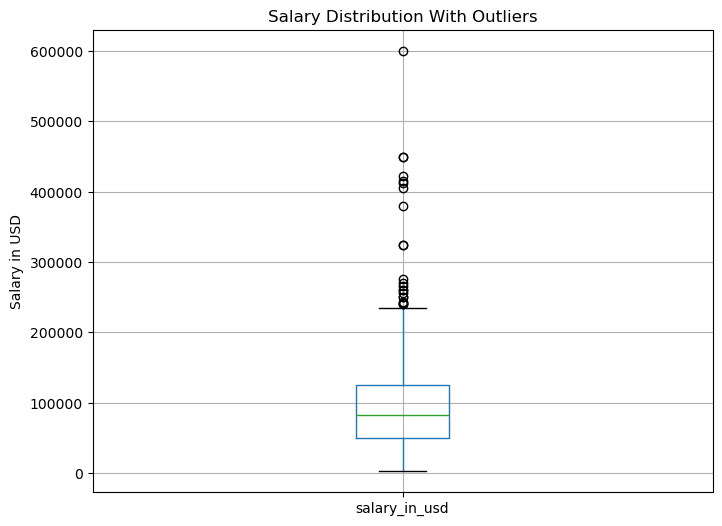

In [ ]:
# Plot salary boxplot before filtering
plt.figure(figsize=(8,6))
combined.boxplot(column='salary_in_usd')
plt.title('Salary Distribution With Outliers')
plt.ylabel('Salary in USD')
plt.show()

In [32]:
#Check Summary Statistics
print("Salary statistics before filtering:")
print(combined['salary_in_usd'].describe())


Salary statistics before filtering:
count      1010.000000
mean      95487.340594
std       62510.635287
min        2859.000000
25%       49830.500000
50%       82325.000000
75%      125000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64


In [39]:
#Remove or Flag Outliers

Q1 = combined['salary_in_usd'].quantile(0.25)
Q3 = combined['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

filtered_combined = combined[
    (combined['salary_in_usd'] >= Q1 - 1.5 * IQR) &
    (combined['salary_in_usd'] <= Q3 + 1.5 * IQR)
]


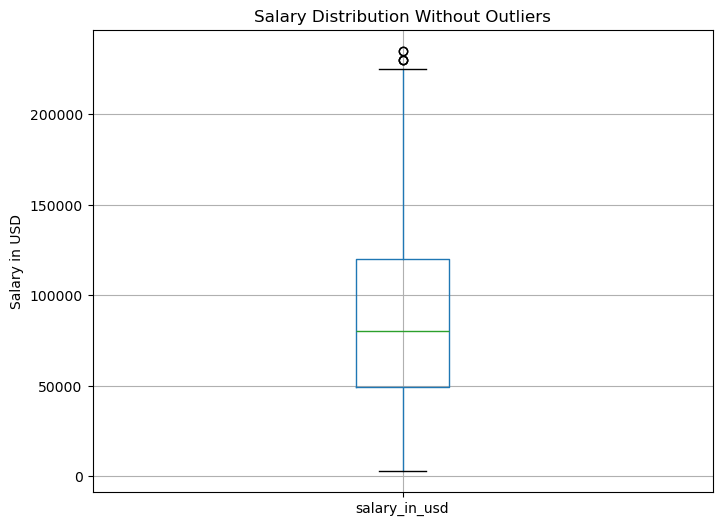

In [41]:
# Plot salary boxplot after filtering
plt.figure(figsize=(8,6))
filtered_combined.boxplot(column='salary_in_usd')
plt.title('Salary Distribution Without Outliers')
plt.ylabel('Salary in USD')
plt.show()


In [46]:
# Salary summary after filtering
print("Salary statistics after filtering:")
print(filtered_combined['salary_in_usd'].describe())

print(f"Filtered dataset shape: {filtered_combined.shape}")
print(f"Job title counts after filtering:\n{filtered_combined['job_title'].value_counts()}")

print(filtered_combined.shape)
print(filtered_combined.head())

Salary statistics after filtering:
count       988.000000
mean      90285.338057
std       50457.533227
min        2859.000000
25%       49133.500000
50%       80486.500000
75%      120000.000000
max      235000.000000
Name: salary_in_usd, dtype: float64
Filtered dataset shape: (988, 6)
Job title counts after filtering:
job_title
Data Analyst                  470
Data Engineer                 233
Data Scientist                225
Machine Learning Developer     60
Name: count, dtype: int64
(988, 6)
   date     job_title  salary_in_usd work_mode country  \
1  2025  Data Analyst        50000.0    hybrid      GB   
2  2025  Data Analyst        24000.0    onsite      GB   
3  2025  Data Analyst        35000.0    onsite      GB   
4  2025  Data Analyst        43779.0    onsite      GB   
5  2025  Data Analyst        25904.0    onsite      GB   

                                              skills  
1                  [excel, power bi, python, r, sql]  
2  [SQL, Excel, Python, R, Tableau, Po

skills
Python                          892
SQL                             833
Communication                   612
Statistics                      612
R                               612
Excel                           388
Tableau                         388
Power BI                        388
Cleaning data                   388
Reporting                       388
Business insight                388
Critical thinking               388
Visualization (e.g. Tableau)    224
Model validation                224
Machine learning                224
Domain knowledge                224
Data cleaning                   224
Big data (e.g. Spark)           224
Docker                          221
pipelines                       221
Name: count, dtype: int64


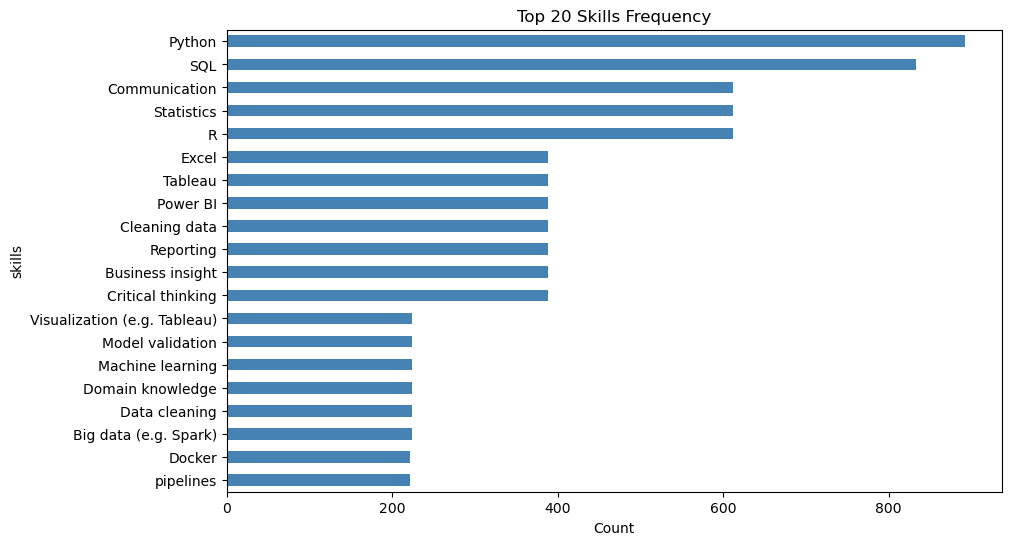

In [47]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the list of skills from all rows
all_skills = filtered_combined['skills'].explode()

# Count occurrences of each skill
skill_counts = all_skills.value_counts()

print(skill_counts.head(20))  # Top 20 skills

# Plot top 20 skills
plt.figure(figsize=(10,6))
skill_counts.head(20).plot(kind='barh', color='steelblue')
plt.gca().invert_yaxis()
plt.title('Top 20 Skills Frequency')
plt.xlabel('Count')
plt.show()


skills                      Python  SQL  Statistics    R  Communication  \
job_title                                                                 
Data Analyst                   388  388         388  388            388   
Data Engineer                  221  221           0    0              0   
Data Scientist                 224  224         224  224            224   
Machine Learning Developer      59    0           0    0              0   

skills                      Power BI  Business insight  Cleaning data  \
job_title                                                               
Data Analyst                     388               388            388   
Data Engineer                      0                 0              0   
Data Scientist                     0                 0              0   
Machine Learning Developer         0                 0              0   

skills                      Tableau  Critical thinking  
job_title                                            

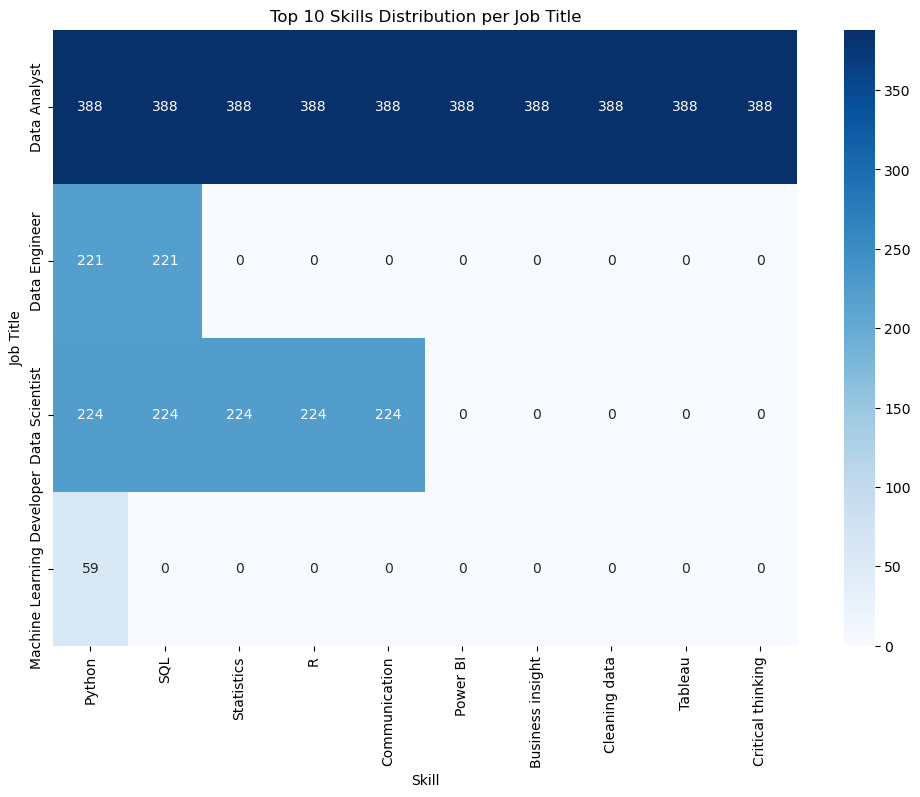

In [48]:
# Create a dataframe of job_title and exploded skills
skills_per_job = filtered_combined[['job_title', 'skills']].explode('skills')

# Count skills per job title
skills_job_counts = skills_per_job.groupby(['job_title', 'skills']).size().unstack(fill_value=0)

# Show top 10 skills per job (by total count)
top_skills = skills_job_counts.sum(axis=0).sort_values(ascending=False).head(10).index
skills_job_counts_top = skills_job_counts[top_skills]

print(skills_job_counts_top)

# Plot heatmap of skills vs job titles
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(skills_job_counts_top, annot=True, fmt='d', cmap='Blues')
plt.title('Top 10 Skills Distribution per Job Title')
plt.ylabel('Job Title')
plt.xlabel('Skill')
plt.show()



country
US    506
GB    217
FR     68
DE     32
CA     30
IN     24
ES     14
GR     11
NL      8
JP      5
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
Name: count, dtype: int64


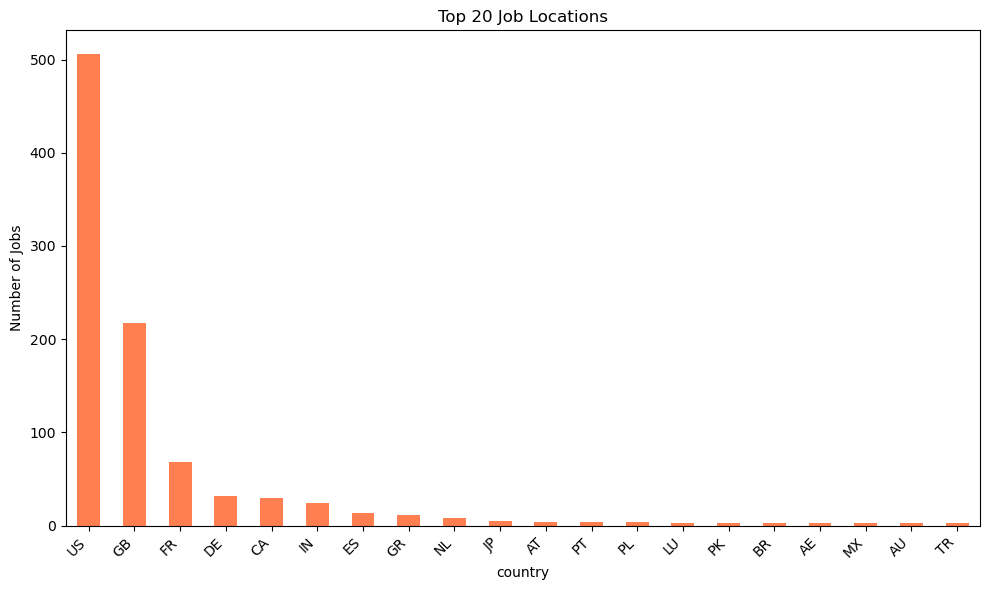

In [ ]:
#Jobs count by country
location_counts = filtered_combined['country'].value_counts()

print(location_counts.head(20))  # Top 20 locations

plt.figure(figsize=(10,6))
location_counts.head(20).plot(kind='bar', color='coral')
plt.title('Top 20 Job Locations')
plt.xlabel('country')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [50]:
print(combined.columns)


Index(['date', 'job_title', 'salary_in_usd', 'work_mode', 'country', 'skills'], dtype='object')


Total remote jobs: 403
Top countries for remote jobs:
country
US    276
GB     29
CA     19
ES     12
DE     12
IN     11
GR      8
PL      4
NL      3
NG      2
Name: count, dtype: int64


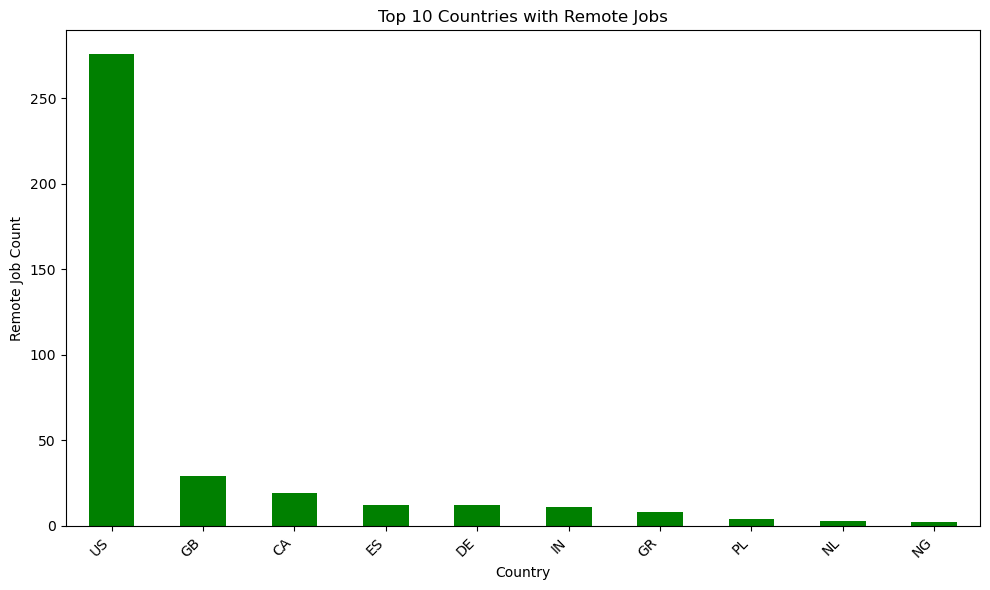

In [58]:
#Filter remote jobs and analyze countries

remote_jobs = filtered_combined[filtered_combined['work_mode'].str.lower() == 'remote']

print("Total remote jobs:", remote_jobs.shape[0])

# Top countries with remote jobs
remote_country_counts = remote_jobs['country'].value_counts()

print("Top countries for remote jobs:")
print(remote_country_counts.head(10))

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
remote_country_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Countries with Remote Jobs')
plt.xlabel('Country')
plt.ylabel('Remote Job Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top fields for remote jobs:
job_title
Data Engineer                 153
Data Analyst                  120
Data Scientist                117
Machine Learning Developer     32
Name: count, dtype: int64


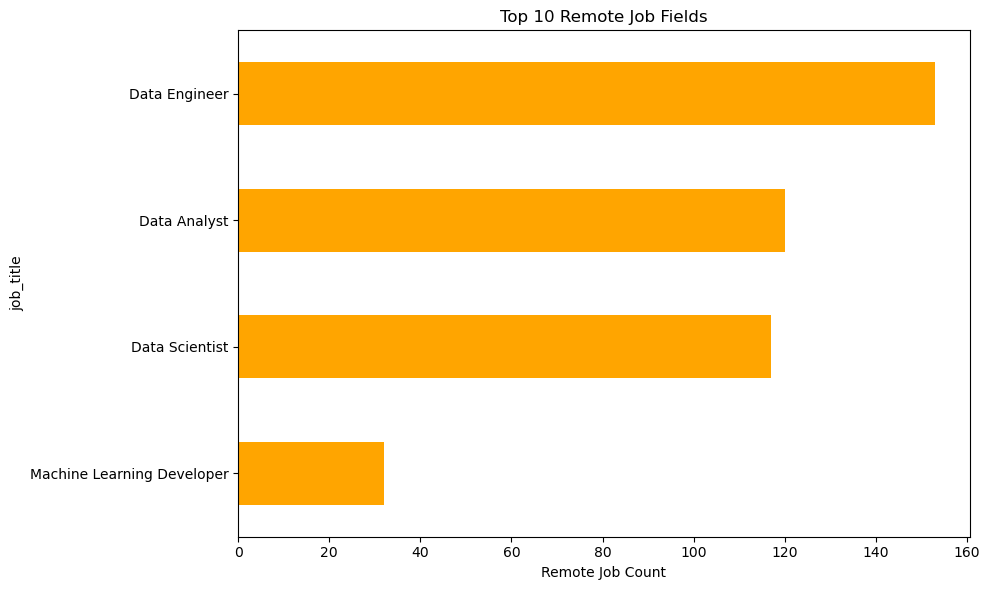

In [52]:
#Analyze remote job fields
remote_fields = remote_jobs['job_title'].value_counts()

print("Top fields for remote jobs:")
print(remote_fields.head(10))

plt.figure(figsize=(10,6))
remote_fields.head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Remote Job Fields')
plt.xlabel('Remote Job Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


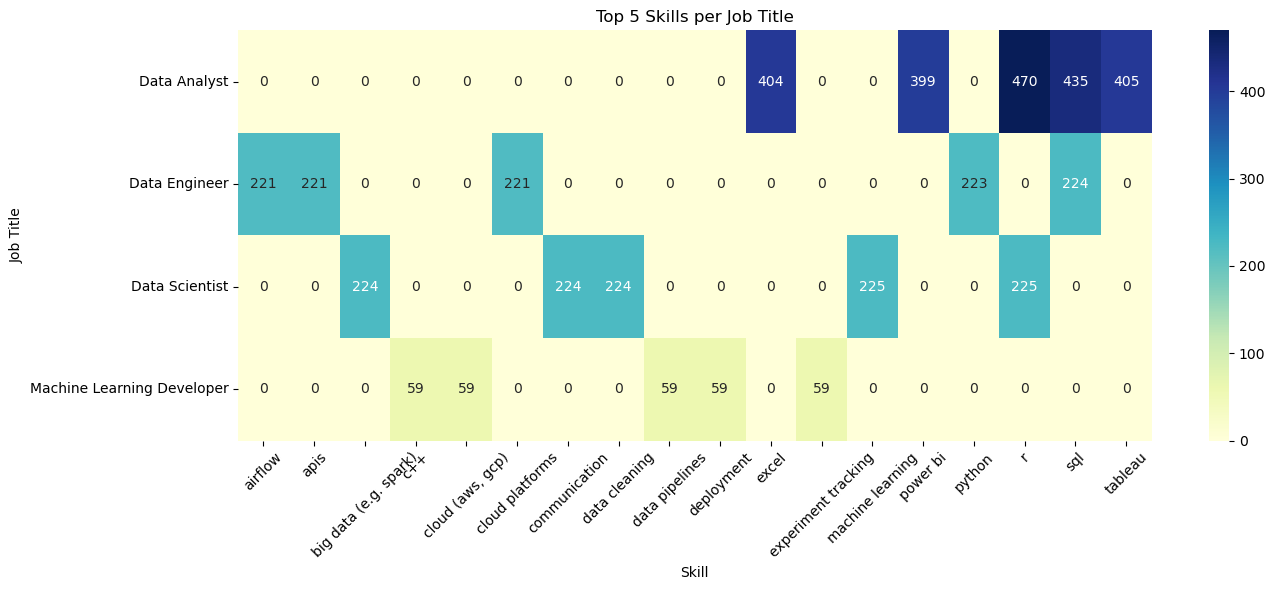

In [78]:
# Group by job title and skills
grouped = exploded_df.groupby(['job_title', 'skills']).size().reset_index(name='count')

# Get top 5 skills per job title using sorting and filtering (no apply)
top_skills_per_job = (
    grouped.sort_values(['job_title', 'count'], ascending=[True, False])
    .groupby('job_title')
    .head(5)
)

# Pivot for heatmap
pivot_dynamic = top_skills_per_job.pivot(index='job_title', columns='skills', values='count').fillna(0)

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_dynamic, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Top 5 Skills per Job Title")
plt.ylabel("Job Title")
plt.xlabel("Skill")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
